In [1]:
!git init

Initialized empty Git repository in C:/Users/User/Desktop/Data Science/git_movie/.git/


# Investigating tmdb-movies data set
The data set contains 21 different features such as popularity, budget, revenue, genres, directors, etc about over 10,000 movies. The aim of this project is to investigate the data and find insights.

#### import librabries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec

%matplotlib inline

#### load dataset

In [3]:
movie_data = pd.read_csv('tmdb-movies.csv')
print(movie_data.shape)
movie_data.head()

(10866, 21)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### data_assessment and cleaning

In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [5]:
movie_data.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [6]:
movie_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


# Observations
1. The data have 21 columns and 10866 rows

2. Some columns have to many missing values, the ought to be dropped. 

3. Duplicated rows will also be dropped

4. Some columns contain outliers. 'popularity' for example has 75% of data below 0.7, then max value of 32. 'budget', 'revenue', 'runtime' and 'vote_count' columns also require attention

5. some columns need to be removed for better analysis, e.g those object columns with so many different unique entries that are not relevant

In [7]:
col_drop = ['id','homepage','keywords', 'tagline', 'cast','production_companies']
movie_data.drop(col_drop, axis = 1, inplace = True)

movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
imdb_id           10856 non-null object
popularity        10866 non-null float64
budget            10866 non-null int64
revenue           10866 non-null int64
original_title    10866 non-null object
director          10822 non-null object
overview          10862 non-null object
runtime           10866 non-null int64
genres            10843 non-null object
release_date      10866 non-null object
vote_count        10866 non-null int64
vote_average      10866 non-null float64
release_year      10866 non-null int64
budget_adj        10866 non-null float64
revenue_adj       10866 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [8]:
#check duplicated rows
movie_data.duplicated().sum()

1

In [9]:
#drop duplicate rows
movie_data.drop_duplicates(inplace = True)
movie_data.duplicated().sum()

0

In [10]:
#check null values
movie_data.isnull().sum()

imdb_id           10
popularity         0
budget             0
revenue            0
original_title     0
director          44
overview           4
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

genres is the only column of importance in my investigation. I will drop rows with missing genres

In [11]:
movie_data = movie_data.dropna(subset = ['genres'])
movie_data.isnull().sum()

imdb_id            8
popularity         0
budget             0
revenue            0
original_title     0
director          42
overview           3
runtime            0
genres             0
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

##### outliers

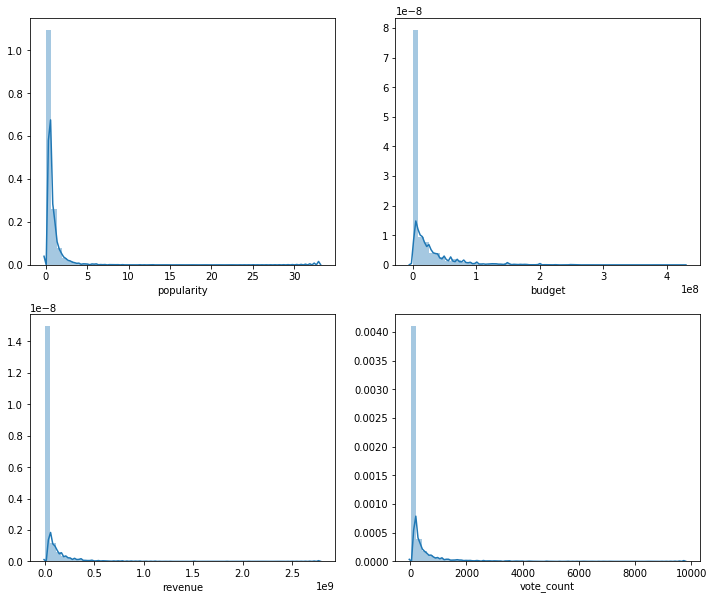

In [12]:
plt.figure(figsize = [12,10])

plt.subplot(2,2,1)
sns.distplot(movie_data['popularity'])

plt.subplot(2,2,2)
sns.distplot(movie_data['budget'])

plt.subplot(2,2,3)
sns.distplot(movie_data['revenue'])

plt.subplot(2,2,4)
sns.distplot(movie_data['vote_count']);

popularity above 10 can be considered outlier

budget above 2.0 * 10^8, and revenue above 1.0 * 10^9 are outliers

vote_count above 4000 are outliers

In [13]:
bud = 2.0*10**8
rev = 1.0*10**9
run = 300
vote = 2200

In [14]:
#remove outliers
movie_df = movie_data.copy()
movie_df = movie_df.query('(popularity < {0}) & (budget < {1}) & (revenue < {2})& (runtime < {3}) & (vote_count < {4})'
                              .format(10, bud, rev,run,vote))
movie_df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10602.000000,1.060200e+04,1.060200e+04,10602.000000,10602.000000,10602.000000,10602.000000,1.060200e+04,1.060200e+04
mean,0.564603,1.246496e+07,2.952760e+07,100.790417,154.049708,5.950170,2001.185625,1.539228e+07,4.029035e+07
std,0.611805,2.475282e+07,7.497078e+07,24.724236,301.048498,0.925096,12.868233,2.910022e+07,1.058301e+08
min,0.000188,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.205752,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.377831,0.000000e+00,0.000000e+00,98.000000,37.000000,6.000000,2005.000000,0.000000e+00,0.000000e+00
75%,0.685464,1.500000e+07,2.037049e+07,111.000000,133.000000,6.600000,2011.000000,1.908966e+07,2.907947e+07
max,8.411577,1.950000e+08,9.198388e+08,294.000000,2186.000000,8.900000,2015.000000,2.504192e+08,2.167325e+09


In [15]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.ipynb_checkpoints/
	movies_data.ipynb
	tmdb-movies.csv

nothing added to commit but untracked files present (use "git add" to track)


In [16]:
!git add .

The file will have its original line endings in your working directory
The file will have its original line endings in your working directory
The file will have its original line endings in your working directory


In [17]:
!git commit -m "data assessment and cleaning"

[master (root-commit) 98d5747] data assessment and cleaning
 3 files changed, 11914 insertions(+)
 create mode 100644 .ipynb_checkpoints/movies_data-checkpoint.ipynb
 create mode 100644 movies_data.ipynb
 create mode 100644 tmdb-movies.csv


# Questions

1. What properties are associated with the movies that have high revenue?
2. What properties influenced popularity?
3. What factors are associated with budget?
4. Which Genres are most popular from year to year?
5. Did the number of genres affect popularity? budget? vote_count or revenue?

### Revenue

In [18]:
#scatter plot function
def scatter_plot(x,y):
    plt.scatter(data = movie_df, x = x, y = y)
    plt.xlabel(x, fontsize = 12)
    plt.ylabel(y, fontsize = 12)
    plt.title('{} Vs {}'.format(x,y), fontsize = 14)
    
#rolling averages function
def rolling_avg(y):
    yr = movie_df.groupby('release_year')[y].mean()
    yr.rolling(window = 5).mean().plot()
    plt.ylabel('average {}'.format(y))
    plt.title('Change in {} with release_year'.format(y))

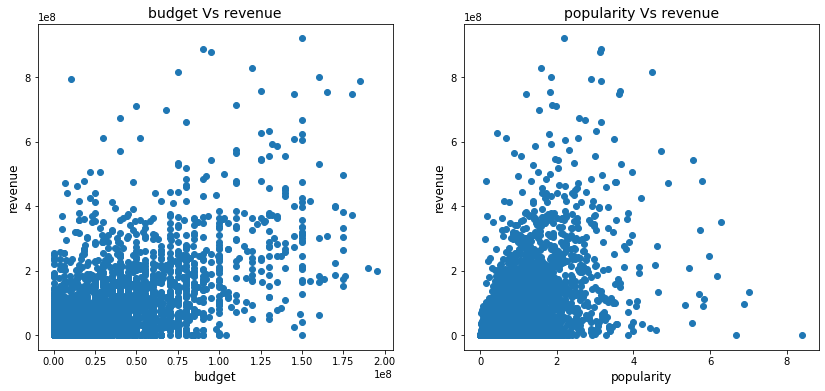

In [19]:
plt.figure(figsize = (14,6))

plt.subplot(1,2,1)
scatter_plot('budget', 'revenue')


plt.subplot(1,2,2)
scatter_plot('popularity', 'revenue');

The Revenue increased as budget increased.

There is also a positive correlation between revenue and popularity. It is expected for movies with higher popularity to yield more revenue.

In [20]:
#Genres and Revenue
movie_df.groupby('genres')['revenue'].mean().sort_values(ascending = False)

genres
Science Fiction|Adventure|Family|Fantasy         792910554.0
Comedy|Adventure|Fantasy|Animation|Family        752600867.0
Adventure|Fantasy|Romance                        712171856.0
Animation|Family|Comedy|Adventure                660940780.0
Adventure|Fantasy|Drama|Romance                  657483858.5
                                                    ...     
Comedy|Drama|Romance|TV Movie                            0.0
Comedy|Drama|Romance|Science Fiction|Thriller            0.0
Comedy|Drama|Romance|Science Fiction                     0.0
Mystery|Romance|Thriller                                 0.0
Romance|Comedy|Thriller                                  0.0
Name: revenue, Length: 2001, dtype: float64

it is not easy to tell from the above information if genres affects revenue. Perhaps expandind the collection of genres would give more insight

In [21]:
#point plot
def point_plot(x,y):
    sns.pointplot(data = movie_df, x = x, y = y, ci = None)
    plt.xlabel(x, fontsize = 12)
    plt.ylabel(y, fontsize = 12)
    plt.title('Change in {} over time'.format(y), fontsize = 14)
    plt.xticks(rotation = 90)

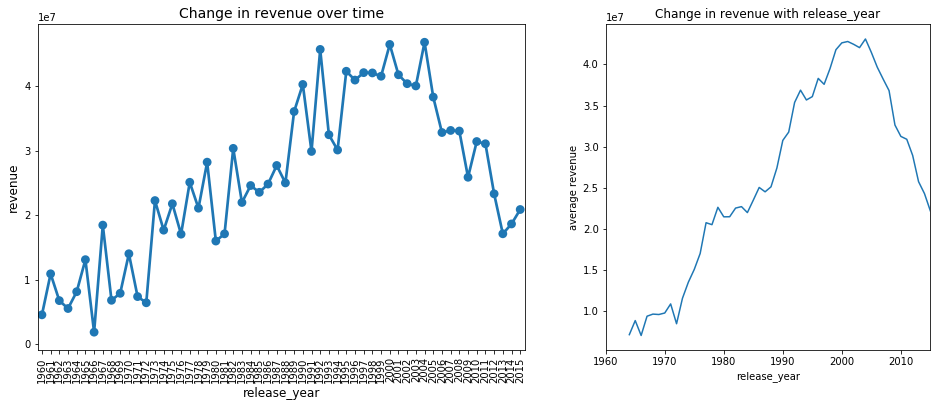

In [22]:
plt.figure(figsize = [16, 6])

gs = gridspec.GridSpec(1, 2, width_ratios=[3, 2])
plt.subplot(gs[0])
point_plot('release_year', 'revenue')

plt.subplot(gs[1])
rolling_avg('revenue')

There tend to be an increase in revenue over the years until around year 2004, then revenue started decreasing as the years went by.
I think the time it started dropping was about the time the internet and social media started becoming common. People's interests in movies started drifting away gradually, so did the revenue generated by these movies.

### Popularity

1. Popularity and Budget: Do high budget movies have higher popularity compared to low budget ones?
2. Popularity and year of release: Did Popularity increase based on year of release?
3. Popularity and vote_count:Is it vote count that determines popularity?

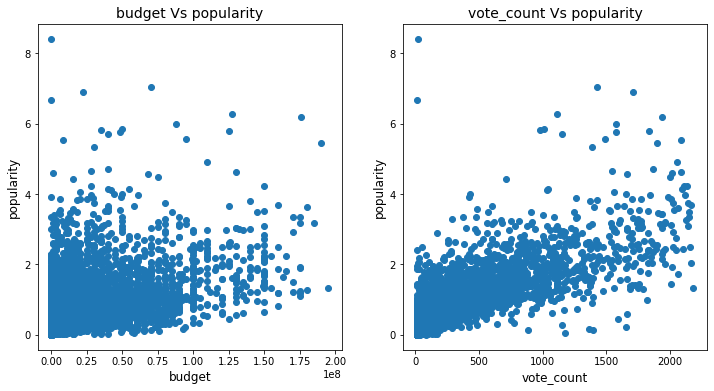

In [23]:
plt.figure(figsize = [12, 6])
plt.subplot(1,2,1)
scatter_plot('budget', 'popularity')

plt.subplot(1,2,2)
scatter_plot('vote_count', 'popularity')

In [24]:
print(movie_df['budget'].corr(movie_df['popularity']))
print(movie_df['vote_count'].corr(movie_df['popularity']))

0.5284282946937754
0.7998509756516675


Popularity looks like it increased with increased budget.

Vote_count must have been very vital in determining popularity. Popularity increased as vote count did.

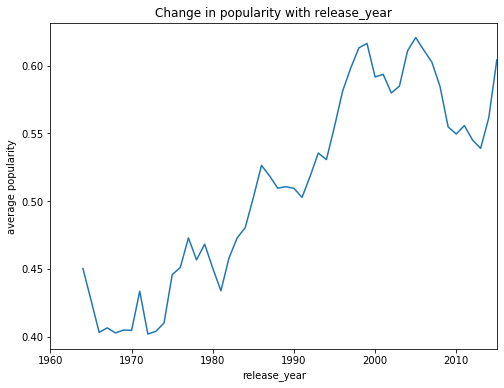

In [26]:
plt.figure(figsize = [8,6])
rolling_avg('popularity');

In general, there seems to be an increase in popularity of the years until 2004. In 2004, popularity declined for about 8 years then started increasing again.

### Budget

1. Budget and release year: Did budget increase over the years? considering inflation and increasing cost
2. Budget and Vote count: Did the movies with higher vote count have higher budget?
3. Budget and runtime: Did longer movies cost more?

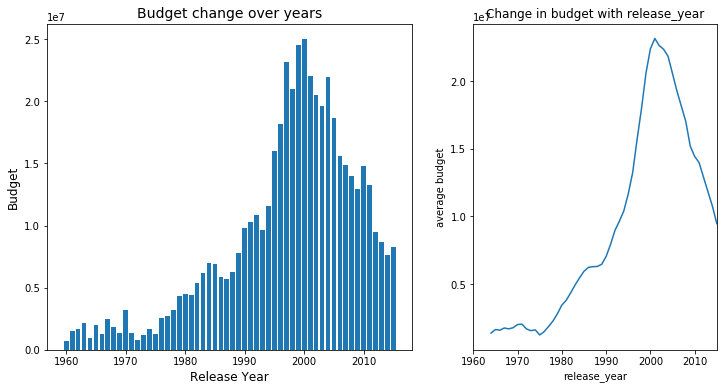

In [28]:
br = movie_df.groupby('release_year')['budget'].mean()

plt.figure(figsize = (12,6))

plt.subplot(gs[0])
plt.bar(br.index, br)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Budget', fontsize=12)
plt.title('Budget change over years', fontsize = 14)

plt.subplot(gs[1])
rolling_avg('budget')

Notice a steady increase in budget over the years until year 2000 when it started declining. I believe with improvement in technology, cheaper methods became available for movie production.